In [68]:
from pyevolve import G1DList, GAllele
from pyevolve import GSimpleGA
from pyevolve import Mutators
from pyevolve import Crossovers
from pyevolve import Consts

import sys, random
random.seed(1024)
from math import sqrt

In [70]:
from PIL import Image, ImageDraw, ImageFont

In [80]:
def cartesian_matrix(coords):
    matrix={}
    for i,(x1,y1) in enumerate(coords):
        for j,(x2,y2) in enumerate(coords):
            dx, dy = x1-x2, y1-y2
            dist=sqrt(dx*dx + dy*dy)
            matrix[i,j] = dist
    return matrix

In [81]:
def tour_length(matrix, tour):
    total = 0
    t = tour.getInternalList()
    for i in range(CITIES):
        j      = (i+1)%CITIES
        total += matrix[t[i], t[j]]
    return total


In [82]:
def write_tour_to_img(coords, tour, img_file):
    padding=20
    coords=[(x+padding,y+padding) for (x,y) in coords]
    maxx,maxy=0,0
    for x,y in coords:
        maxx, maxy = max(x,maxx), max(y,maxy)
    maxx+=padding
    maxy+=padding
    img=Image.new("RGB",(int(maxx),int(maxy)),color=(255,255,255))
    font=ImageFont.load_default()
    d=ImageDraw.Draw(img);
    num_cities=len(tour)
    for i in range(num_cities):
        j=(i+1)%num_cities
        city_i=tour[i]
        city_j=tour[j]
        x1,y1=coords[city_i]
        x2,y2=coords[city_j]
        d.line((int(x1),int(y1),int(x2),int(y2)),fill=(0,0,0))
        d.text((int(x1)+7,int(y1)-5),str(i),font=font,fill=(32,32,32))

    for x,y in coords:
        x,y=int(x),int(y)
        d.ellipse((x-5,y-5,x+5,y+5),outline=(0,0,0),fill=(196,196,196))
    del d
    img.save(img_file, "PNG")
    print "The plot was saved into the %s file." % (img_file,)


In [89]:
def G1DListTSPInitializator(genome, **args):
   
    lst = [i for i in xrange(genome.getListSize())]
    random.shuffle(lst)
    genome.setInternalList(lst)



In [90]:
cm     = []
coords = []
CITIES = 100
WIDTH   = 1024
HEIGHT  = 768
LAST_SCORE = -1

global cm, coords, WIDTH, HEIGHT


In [91]:

coords = [(random.randint(0, WIDTH), random.randint(0, HEIGHT))
     for i in xrange(CITIES)]
cm     = cartesian_matrix(coords)
genome = G1DList.G1DList(len(coords))

genome.evaluator.set(lambda chromosome: tour_length(cm, chromosome))
genome.crossover.set(Crossovers.G1DListCrossoverEdge)
genome.initializator.set(G1DListTSPInitializator)


In [94]:

# 3662.69
ga = GSimpleGA.GSimpleGA(genome)
ga.setGenerations(2000)
ga.setMinimax(Consts.minimaxType["minimize"])
ga.setCrossoverRate(1.0)
ga.setMutationRate(0.02)
ga.setPopulationSize(80)

# # This is to make a video
# ga.stepCallback.set(evolve_callback)
# # 21666.49
# import psyco
# psyco.full()

ga.evolve(freq_stats=50)
best = ga.bestIndividual()


write_tour_to_img(coords, best, "tsp_result.png")

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [55281.37(51781.34)/40904.01(42865.62)/46067.81(46067.81)]
Gen. 50 (2.50%): Max/Min/Avg Fitness(Raw) [35211.34(32157.76)/22360.32(25993.50)/29342.79(29342.79)]
Gen. 100 (5.00%): Max/Min/Avg Fitness(Raw) [34149.06(31428.17)/21744.43(24953.72)/28457.55(28457.55)]
Gen. 150 (7.50%): Max/Min/Avg Fitness(Raw) [29507.55(27568.01)/19621.52(21580.85)/24589.63(24589.63)]
Gen. 200 (10.00%): Max/Min/Avg Fitness(Raw) [29166.89(27645.90)/19407.20(20939.88)/24305.74(24305.74)]
Gen. 250 (12.50%): Max/Min/Avg Fitness(Raw) [29641.37(28105.24)/19104.45(20844.70)/24701.15(24701.15)]
Gen. 300 (15.00%): Max/Min/Avg Fitness(Raw) [27922.31(25410.38)/16448.88(20129.93)/23268.59(23268.59)]
Gen. 350 (17.50%): Max/Min/Avg Fitness(Raw) [28880.36(26553.99)/15968.96(19882.81)/24066.96(24066.96)]
Gen. 400 (20.00%): Max/Min/Avg Fitness(Raw) [28528.37(26231.07)/16245.49(19882.81)/23773.64(23773.64)]
Gen. 450 (22.50%): Max/Min/Avg Fitness(Raw) [28050.86(25837.71)/16742.96(19882.8

AttributeError: type object 'Image' has no attribute 'new'

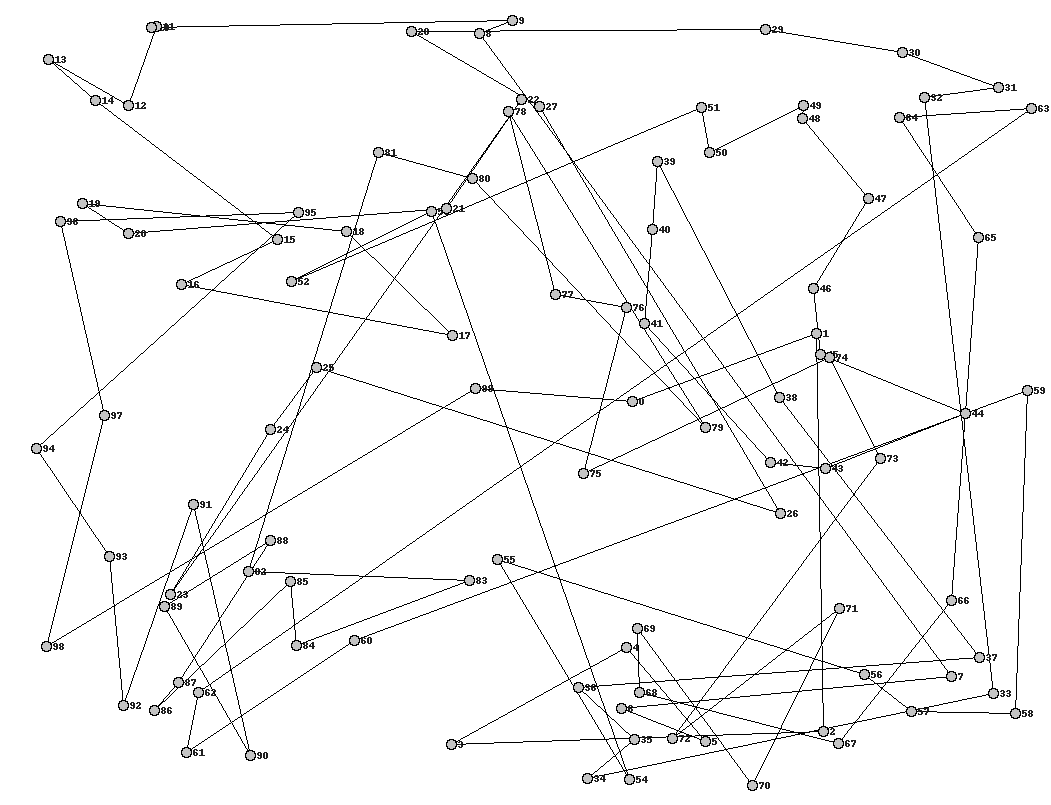

In [95]:
from IPython.display import Image
Image("tsp_result.png")